In [211]:
import pandas as pd
import numpy as np
import gensim
import re
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from IPython.display import display, Markdown
import datasets


The data is separated by year. I will be starting from 2000 and I removed the unknown sub-folder within the data folder Each of the folders will be converted to dataframes that correspond to a specific year with rows that represent each of the files.

Each of the files in the folders will be first go through a content check (if the document is too short (empty) or too long (over 1000 lines) it will be discarded).

If the file passes the length check it will then be shortened to remove the header and have its contents added to the dataframe.

This dataframe will then be added to a dictionary that maps years to the corresponding dataframe. 

In [212]:
def remove_files(text):
    count = len(text.split(" "))
    if  count < 1000 or count > 100000:
        return True
    return False

In [213]:
def create_dictionary():
    dataset = datasets.load_dataset("siavava/ai-tech-articles")
    df = dataset["train"].to_pandas()  # there's only the 'train' split because HF requires it.

    # split df by year
    years = df["year"].unique()
    dfs = {}
    for year in sorted(years):
        year_df = df[df["year"] == year]
        year_df.apply(lambda row: np.nan if remove_files(row['text']) else row['text'], axis = 1)
        year_df = year_df.dropna(subset=['text'])
        year_df = year_df.sample(n=min(100, len(year_df)), random_state=5432534)
        dfs[year] = year_df 

    return dfs

In [214]:
year_dictionary = create_dictionary()

In [215]:
for year in year_dictionary:
    display(Markdown(f"### Year: {year}"))
    display(Markdown(f"Number of articles: {len(year_dictionary[year])}"))
    display(year_dictionary[year].head(3))
    display(Markdown("---"))

### Year: 2001

Number of articles: 3

,id,year,title,url,text
1143,1184,2001,"""Department Of Computer Science | Makerere Uni...","""https://cs.mak.ac.ug/curriculum/undergraduate...","""Makerere University Department of Computer Sc..."
1122,1155,2001,"""Chromosome territories, nuclear architecture ...","""https://doi.org/10.1038%2F35066075""","""Thank you for visiting nature.com. You are us..."
1142,1183,2001,"""Department Of Computer Science | Makerere Uni...","""https://cs.mak.ac.ug/curriculum""","""Makerere University Department of Computer Sc..."


---

### Year: 2003

Number of articles: 1

,id,year,title,url,text
2266,2326,2003,"""Introduction to the Old English poem called B...","""https://www.heorot.dk/beowulf-vorwort""","""An Introduction to the Structure & Making of ..."


---

### Year: 2004

Number of articles: 1

,id,year,title,url,text
2298,2362,2004,"""Halo 2 | Halo Alpha | Fandom""","""https://halo.fandom.com/wiki/Halo_2""","""Explore Main Page Discuss All Pages Community..."


---

### Year: 2005

Number of articles: 6

,id,year,title,url,text
903,935,2005,"""ISOTOPES IN MARINE SEDIMENTS | SpringerLink""","""https://doi.org/10.1007%2F1-4020-2504-1_06""","""Advertisement Log in Menu Search Cart Isotope..."
2016,2071,2005,"""Intel's Brain-Inspired Loihi 2 Chip Can Hold ...","""https://blubrry.com/singularityhub/81843287/i...","""Podcast Hosting Hosting Plans Easy-to-use too..."
902,934,2005,"""自然語言處理 - 维基百科，自由的百科全书""","""https://zh.wikipedia.org/wiki/%E8%87%AA%E7%84...","""主菜单 首页 分类索引 特色内容 新闻动态 最近更改 随机条目 资助维基百科 帮助 维基社..."


---

### Year: 2006

Number of articles: 4

,id,year,title,url,text
697,720,2006,"""""CBLL, Research Projects, Computational and B...","""http://www.cs.nyu.edu/~yann/research""","""CBLL HOME VLG Group News/Events Seminars Peop..."
2297,2361,2006,"""Halo: Ghosts of Onyx | Halo Alpha | Fandom""","""https://halo.fandom.com/wiki/Halo:_Ghosts_of_...","""Explore Main Page Discuss All Pages Community..."
1124,1158,2006,"""An integrated view of protein evolution | Nat...","""https://doi.org/10.1038%2Fnrg1838""","""Thank you for visiting nature.com. You are us..."


---

### Year: 2007

Number of articles: 3

,id,year,title,url,text
1123,1157,2007,"""Identification and analysis of functional ele...","""https://doi.org/10.1038%2Fnature05874""","""Thank you for visiting nature.com. You are us..."
699,723,2007,"""""CBLL, Research Projects, Computational and B...","""http://www.cs.nyu.edu/~yann/research/relreg""","""CBLL HOME VLG Group News/Events Seminars Peop..."
1120,1153,2007,"""Discovering DNA: Friedrich Miescher and the e...","""https://doi.org/10.1007%2Fs00439-007-0433-0""","""Advertisement Log in Menu Search Cart Home Hu..."


---

### Year: 2008

Number of articles: 5

,id,year,title,url,text
400,420,2008,"""Diversity and Evolution of Coral Fluorescent ...","""http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...","""An official website of the United States gove..."
2286,2350,2008,"""Abe Burmeister – On my Om""","""https://pi.co/abe-burmeister""","""On my Om On Technology & Change Search About ..."
265,277,2008,"""Abundance360 by Peter Diamandis""","""https://www.abundance360.com""","""Abundance360 Applications Are Now Open by Sin..."


---

### Year: 2009

Number of articles: 12

,id,year,title,url,text
1760,1812,2009,"""Blue Zones: Places in the World Where People ...","""https://singularityhub.com/2009/07/20/blue-zo...","""Topics AI Biotech Computing Space Energy Futu..."
899,930,2009,"""Implementing an online help desk system based...","""https://doi.org/10.1145%2F1643823.1643908""","""Dartmouth College Advanced Search Browse Abou..."
2300,2364,2009,"""Halo Wars | Halo Alpha | Fandom""","""https://halo.fandom.com/wiki/Halo_Wars""","""Explore Main Page Discuss All Pages Community..."


---

### Year: 2010

Number of articles: 3

,id,year,title,url,text
1606,1655,2010,"""REBUS and the Anarchic Brain: Toward a Unifie...","""https://doi.org/10.1124/pr.118.017160""","""Main menu Home Articles Current Issue Fast Fo..."
401,421,2010,"""Synthetic biology: applications come of age -...","""http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...","""An official website of the United States gove..."
408,428,2010,"""Synthetic biology: applications come of age |...","""https://doi.org/10.1038%2Fnrg2775""","""Thank you for visiting nature.com. You are us..."


---

### Year: 2011

Number of articles: 4

,id,year,title,url,text
730,756,2011,"""Stochastic gradient descent - Wikipedia""","""https://en.wikipedia.org/wiki/Stochastic_grad...","""Main menu Main page Contents Current events R..."
2059,2114,2011,"""Kurzweil Speaks on the Future of Computer Tra...","""https://singularityhub.com/2011/06/23/kurzwei...","""Topics AI Biotech Computing Space Energy Futu..."
2027,2082,2011,"""David J. Hill, Author at Singularity Hub""","""https://singularityhub.com/author/dhill""","""Topics AI Biotech Computing Space Energy Futu..."


---

### Year: 2012

Number of articles: 8

,id,year,title,url,text
985,1017,2012,"""Fiji: an open-source platform for biological-...","""https://doi.org/10.1038%2Fnmeth.2019""","""Thank you for visiting nature.com. You are us..."
1621,1670,2012,"""About Us - Fusion Processing""","""https://www.fusionproc.com/about-us""","""Autonomous Vehicle Systems CAVstar® Automated..."
2097,2152,2012,"""Weather Analysis and Forecasting - American M...","""https://www.ametsoc.org/ams/index.cfm/about-a...","""Attention Internet Explorer User: Parts of th..."


---

### Year: 2013

Number of articles: 6

,id,year,title,url,text
669,691,2013,"""Tech Policy Lab | University of Washington""","""https://techpolicylab.uw.edu""","""Tech Policy Lab University of Washington Join..."
2265,2325,2013,"""Annotated List of Beowulf Translations: The L...","""https://web.archive.org/web/20141121165748/ht...","""Oct NOV May 21 2013 2014 2016 success fail Ab..."
311,325,2013,"""Chill: Robots Won't Take All Our Jobs | WIRED""","""https://www.wired.com/2017/08/robots-will-not...","""WIRED Logo The Great Tech Panic: Robots Won’t..."


---

### Year: 2014

Number of articles: 10

,id,year,title,url,text
1819,1872,2014,"""IARPA - MICrONS""","""https://www.iarpa.gov/research-programs/microns""","""The MICrONS program aimed to close the perfor..."
1886,1939,2014,"""Helion secures $2.2B to commercialize fusion ...","""https://techcrunch.com/2021/11/05/helion-seri...","""Helion secures $2.2B to commercialize fusion ..."
754,782,2014,"""OII | People""","""https://www.oii.ox.ac.uk/people/dphil-students""","""Research Research Section Home Research Areas..."


---

### Year: 2015

Number of articles: 31

,id,year,title,url,text
1126,1163,2015,"""Google develops computer program capable of l...","""https://www.theguardian.com/technology/2015/f...","""‘Agent’ hailed as first step towards true AI ..."
1207,1254,2015,"""How Gordon Moore Made ‘Moore’s Law’ | WIRED""","""https://www.wired.com/2015/04/how-gordon-moor...","""Open Navigation Menu To revist this article, ..."
360,377,2015,"""Introducing OpenAI""","""https://openai.com/blog/introducing-openai""","""Close Search Skip to main content Site Naviga..."


---

### Year: 2016

Number of articles: 56

,id,year,title,url,text
777,807,2016,"""Deep neural reasoning | Nature""","""https://www.nature.com/articles/nature19477""","""Thank you for visiting nature.com. You are us..."
701,726,2016,"""Artificial intelligence, revealed - Engineeri...","""https://code.fb.com/ai-research/ai-revealed""","""Open Source Open Source Meta Open Source Plat..."
2033,2088,2016,"""Artificial Intelligence Explodes: New Deal Ac...","""https://www.cbinsights.com/blog/artificial-in...","""Platform Data Customers About Login Toggle Me..."


---

### Year: 2017

Number of articles: 82

,id,year,title,url,text
2325,2390,2017,"""Learning from human preferences""","""https://openai.com/blog/deep-reinforcement-le...","""Close Search Skip to main content Site Naviga..."
709,734,2017,"""IndabaX - Deep Learning Indaba 2022""","""https://deeplearningindaba.com/2022/indabax""","""Indaba Programme Posters and Demos Coding and..."
1315,1363,2017,"""This Self-Driving AI Is Learning to Drive Alm...","""https://singularityhub.com/2017/12/18/this-se...","""Topics AI Biotech Computing Space Energy Futu..."


---

### Year: 2018

Number of articles: 100

,id,year,title,url,text
1023,1055,2018,"""Clinically applicable deep learning for diagn...","""https://www.nature.com/articles/s41591-018-01...","""Thank you for visiting nature.com. You are us..."
1017,1049,2018,"""Clinically applicable deep learning for diagn...","""https://www.nature.com/articles/s41591-018-01...","""Thank you for visiting nature.com. You are us..."
1034,1066,2018,"""Clinically applicable deep learning for diagn...","""https://www.nature.com/articles/s41591-018-01...","""Thank you for visiting nature.com. You are us..."


---

### Year: 2019

Number of articles: 100

,id,year,title,url,text
1355,1404,2019,"""Hello quantum world! Google publishes landmar...","""https://www.nature.com/articles/d41586-019-03...","""Thank you for visiting nature.com. You are us..."
331,346,2019,"""Here’s how we can break up Big Tech | by Team...","""https://medium.com/@teamwarren/heres-how-we-c...","""Here’s how we can break up Big Tech Team Warr..."
773,801,2019,"""DeepMind Research on Ladder — StarCraft II — ...","""https://news.blizzard.com/en-us/starcraft2/22...","""® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ® ®..."


---

### Year: 2020

Number of articles: 100

,id,year,title,url,text
2155,2211,2020,"""Enforcing Against Manipulated Media | Meta""","""https://about.fb.com/news/2020/01/enforcing-a...","""Viewing this site in English Portugese German..."
2168,2224,2020,"""Beijing to build $2 billion AI research park:...","""https://www.reuters.com/article/us-china-arti...","""Discover Thomson Reuters for-phone-only for-t..."
85,90,2020,"""MuZero: Mastering Go, chess, shogi and Atari ...","""https://deepmind.com/blog/article/muzero-mast...","""DeepMind Search Search Close DeepMind About O..."


---

### Year: 2021

Number of articles: 100

,id,year,title,url,text
541,562,2021,"""Podcast: What is AI? We made this radio play ...","""https://www.technologyreview.com/2021/11/24/1...","""Featured Topics Newsletters Events Podcasts F..."
128,139,2021,"""Cerebras Upgrades Trillion-Transistor Chip to...","""https://singularityhub.com/2021/08/27/cerebra...","""Topics AI Biotech Computing Space Energy Futu..."
171,182,2021,"""This Week’s Awesome Tech Stories From Around ...","""https://singularityhub.com/2021/08/28/this-we...","""Topics AI Biotech Computing Space Energy Futu..."


---

### Year: 2022

Number of articles: 100

,id,year,title,url,text
872,903,2022,"""Magnetic control of tokamak plasmas through d...","""https://www.nature.com/articles/s41586-021-04...","""Thank you for visiting nature.com. You are us..."
1539,1588,2022,"""Multi-qubit entanglement and algorithms on a ...","""https://www.nature.com/articles/s41586-022-04...","""Thank you for visiting nature.com. You are us..."
1538,1587,2022,"""Multi-qubit entanglement and algorithms on a ...","""https://www.nature.com/articles/s41586-022-04...","""Thank you for visiting nature.com. You are us..."


---

### Year: 2023

Number of articles: 100

,id,year,title,url,text
1800,1853,2023,"""Topics - Singularity Hub""","""https://singularityhub.com/2021/12/14/the-twi...","""Topics AI Biotech Computing Space Energy Futu..."
1858,1911,2023,"""Topics - Singularity Hub""","""https://singularityhub.com/2021/09/18/this-we...","""Topics AI Biotech Computing Space Energy Futu..."
2134,2189,2023,"""Topics - Singularity Hub""","""https://singularityhub.com/2020/06/03/artific...","""Topics AI Biotech Computing Space Energy Futu..."


---

Now that we have the year dictionary we can begin the process of sentiment analysis.

The sentiment analysis model will return a sentiment number for each file. This number will then be averaged across all the files to get an average sentiment for the year.

From there we can do cosine similarity and plot sentiment for each year.

In [216]:
def add_sentiment(dataframe):

    sentiment_model = SentimentIntensityAnalyzer()
    neg_list = []
    neu_list = []
    pos_list = []
    comp_list = []


    for text in dataframe['text']:
        score_dict = sentiment_model.polarity_scores(text)
        neg_list.append(score_dict['neg'])
        neu_list.append(score_dict['neu'])
        pos_list.append(score_dict['pos'])
        comp_list.append(score_dict['compound'])
    
    dataframe['negative'] = neg_list
    dataframe['neutral'] =  neu_list
    dataframe['positive'] = pos_list
    dataframe['compound'] = comp_list


In [187]:
# text = ["CS89 is an amazing class!"]

# df = pd.DataFrame({'Text': text})

# add_sentiment(df)
# display(df)

In [217]:
for df in year_dictionary.values():
    add_sentiment(df)

In [218]:
def get_sentiment(df, sentiment_type):
    return np.mean(df[sentiment_type])

In [219]:
def get_sentiment_data(year_dict):
    
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    sentiment_df = pd.DataFrame(columns=['year', 'negative', 'neutral', 'positive', 'compound'])
    index = 0

    for year, df in year_dict.items():
        data_list = [int(year)]

        for s_type in sentiment_types:
            data_list.append(get_sentiment(df,s_type))
            
        sentiment_df.loc[index] = data_list
        index = index + 1

    return sentiment_df

In [220]:
sentiment_data_df = get_sentiment_data(year_dictionary)
display(sentiment_data_df)

,year,negative,neutral,positive,compound
0,2001.0,0.023667,0.904000,0.072333,0.999967
1,2003.0,0.040000,0.892000,0.069000,0.999800
2,2004.0,0.112000,0.795000,0.093000,-0.999700
3,2005.0,0.008500,0.912667,0.078833,0.997717
4,2006.0,0.049250,0.864250,0.086500,0.499525
5,2007.0,0.033000,0.909000,0.058000,0.997967
6,2008.0,0.022800,0.865600,0.111600,0.998080
7,2009.0,0.052167,0.873583,0.074417,0.661642
8,2010.0,0.032000,0.895000,0.072667,0.999867
9,2011.0,0.021000,0.894000,0.084500,0.997550


Plot the data with years on the x-axis and the sentiment types in different colors.

In [221]:
def plot_sentiment(df, title):
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    colors_list = ['red', 'blue', 'gold', 'black'] 
    color_choice = 0

    for sentiment_type in sentiment_types:
        plt.plot(df['year'], df[sentiment_type], "o--", label=sentiment_type, color=colors_list[color_choice])
        color_choice = color_choice + 1

    plt.legend()
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Sentiment Score')
    plt.show()

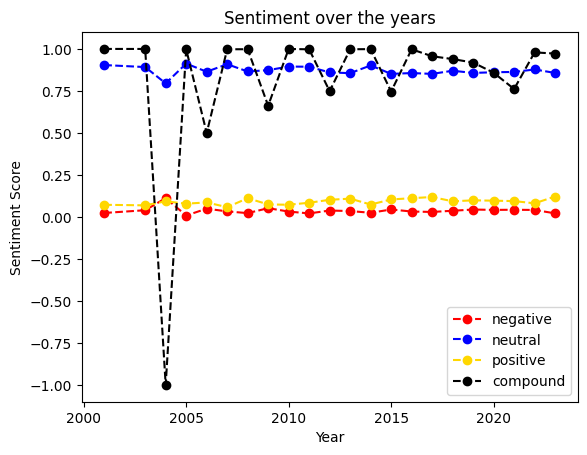

In [222]:
plot_sentiment(sentiment_data_df, "Sentiment over the years")

We can also perform topic modeling on the data. We can then analyze the sentiment within the context of the specific topic. 

I will be using the title column for each file to get an idea of the topic for A.I. Since we are only using the titles, I believe that utilizing LDA topic modeling should be sufficient. 


In [223]:
def clean_titles(text, url):
    start = url.find('https://') + len('https://')
    start = url.find('www.') + len('www.')if 'www.' in url else start

    new_url = url[start:]
    end = new_url.find(".") 
    
    name = url[start:start+end]
    text = re.sub(name, "", text.lower())

    return text


In [195]:
#print(clean_titles("This is an example","https://example.com"))


In [224]:
def get_titles(dictionary):

    all_titles = []

    for df in dictionary.values():
        titles = df[['title', 'url']].apply(lambda row: clean_titles(row['title'], row['url']), axis=1)
        titles = titles.to_list()
        all_titles.append(titles)

    return all_titles

In [225]:
titles = get_titles(year_dictionary)


In [226]:
def lemmatize(text):
    
    lemmer = WordNetLemmatizer()
    pos_set = set(['n', 'a', 'v'])

    lemmatized_text = [lemmer.lemmatize(tok, pos='n') if pos[0].lower() in pos_set else lemmer.lemmatize(tok) 
                        for sent in text for tok, pos in pos_tag(sent, tagset='universal')]
    
    return lemmatized_text

In [227]:
def process_text(text):
    text = lemmatize(text)
    vect = CountVectorizer(stop_words='english')
    features = vect.fit_transform(text)
    vocabulary = vect.get_feature_names()
    return features, vocabulary

In [228]:
processed_titles, vocabulary = process_text(titles)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [229]:
def get_add_topics(features, vocabulary, dictionary):
    topic_dict ={}
    
    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42).fit(features)

    topic_num = 0
    for words in lda_model.components_:
        top_10_list = words.argsort()[:-10 - 1:-1]
        top_10 = [vocabulary[index] for index in top_10_list]
        topic_dict[topic_num] = top_10
        topic_num = topic_num + 1

    topics = lda_model.transform(features)
    topics.shape

    topic_index = -1
    for df in dictionary.values():
        title_topic = [topics[topic_index+i].argmax() for i in range(1,len(df)+1)]
        df['topic'] = title_topic
        topic_index = topic_index + len(df)

    return topic_dict

In [230]:
topics = get_add_topics(processed_titles, vocabulary, year_dictionary)

In [238]:

for topic in topics:
    display(Markdown(f"### Topic: {topic}"))
    display(Markdown(f"Top 10 words:"))
    display(", ".join(topics[topic]))
    display(Markdown("---"))

### Topic: 0

Top 10 words:

'quantum, atom, based, processor, transport, arrays, coherent, entangled, algorithms, neutral'

---

### Topic: 1

Top 10 words:

'ai, technology, review, mit, data, science, nyu, center, research, 35'

---

### Topic: 2

Top 10 words:

'new, artificial, intelligence, ai, google, brain, digital, china, conference, like'

---

### Topic: 3

Top 10 words:

'singularity, hub, topics, learning, deep, medicine, quantum, google, disease, diagnosis'

---

### Topic: 4

Top 10 words:

'using, related, age, predicting, macular, degeneration, conversion, wet, future, science'

---

### Topic: 5

Top 10 words:

'robots, magazine, quanta, verge, people, world, matter, wikipedia, building, microsoft'

---

### Topic: 6

Top 10 words:

'materials, detection, sensors, wearable, biomolecule, biotechnology, embedded, brain, therapy, biology'

---

### Topic: 7

Top 10 words:

'tech, web, stories, week, awesome, energy, law, moore, machine, platform'

---

### Topic: 8

Top 10 words:

'best, ai, iclr, 2023, 2022, make, list, 10, musk, elon'

---

### Topic: 9

Top 10 words:

'synthetic, ai, machines, biology, future, human, like, pmc, humans, wants'

---

In [204]:
#print(year_dictionary[2023]['topic'].values)

Now we can create dataframes grouped by topic and map the sentiment.

In [232]:
def create_topics_dict(dictionary):
    
    new_dict = {}
    
    for topic_num in range(10):
        topic_df = pd.DataFrame()

        for df in dictionary.values():
            temp_df = df[df['topic'] == topic_num]
            topic_df = pd.concat([topic_df, temp_df])
        
        new_dict[topic_num] = topic_df
    
    return new_dict

In [233]:
topic_dictionary = create_topics_dict(year_dictionary)

for topic in topic_dictionary:
    display(Markdown(f"### Topic: {topic}"))
    display(Markdown(f"Number of articles: {len(topic_dictionary[topic])}"))
    display(topic_dictionary[topic].head(3))
    display(Markdown("---"))

### Topic: 0

Number of articles: 54

,id,year,title,url,text,negative,neutral,positive,compound,topic
1327,1375,2009,"""Next Generation Nuclear Power - Scientific Am...","""https://www.scientificamerican.com/article/ne...","""Menu Scientific American Sign In | Newsletter...",0.072,0.827,0.101,0.9994,0
2104,2159,2013,"""FDA Approves Eye Implant Enabling The Blind T...","""https://singularityhub.com/2013/02/19/fda-app...","""Topics AI Biotech Computing Space Energy Futu...",0.036,0.838,0.126,0.9975,0
2319,2383,2013,"""Books | Resources | Greater Good""","""https://greatergood.berkeley.edu/resources/bo...","""Greater Good Science Center • Magazine • In A...",0.063,0.720,0.218,1.0000,0


---

### Topic: 1

Number of articles: 145

,id,year,title,url,text,negative,neutral,positive,compound,topic
697,720,2006,"""""CBLL, Research Projects, Computational and B...","""http://www.cs.nyu.edu/~yann/research""","""CBLL HOME VLG Group News/Events Seminars Peop...",0.032,0.896,0.072,0.9977,1
897,928,2006,"""Project MUSE - The History of Ideas: Precept ...","""https://doi.org/10.1353%2Fjhi.2006.0006""","""Access provided by Dartmouth College Library ...",0.041,0.832,0.126,1.0000,1
699,723,2007,"""""CBLL, Research Projects, Computational and B...","""http://www.cs.nyu.edu/~yann/research/relreg""","""CBLL HOME VLG Group News/Events Seminars Peop...",0.032,0.904,0.064,0.9942,1


---

### Topic: 2

Number of articles: 91

,id,year,title,url,text,negative,neutral,positive,compound,topic
899,930,2009,"""Implementing an online help desk system based...","""https://doi.org/10.1145%2F1643823.1643908""","""Dartmouth College Advanced Search Browse Abou...",0.008,0.906,0.086,0.9966,2
2097,2152,2012,"""Weather Analysis and Forecasting - American M...","""https://www.ametsoc.org/ams/index.cfm/about-a...","""Attention Internet Explorer User: Parts of th...",0.023,0.883,0.095,0.9997,2
1819,1872,2014,"""IARPA - MICrONS""","""https://www.iarpa.gov/research-programs/microns""","""The MICrONS program aimed to close the perfor...",0.014,0.909,0.077,0.9980,2


---

### Topic: 3

Number of articles: 216

,id,year,title,url,text,negative,neutral,positive,compound,topic
2015,2070,2005,"""How Musicologists and Scientists Used AI to C...","""https://blubrry.com/singularityhub/81745484/h...","""Podcast Hosting Hosting Plans Easy-to-use too...",0.013,0.889,0.099,0.9981,3
2014,2069,2005,"""How Quantum Computers Can Be Used to Build Be...","""https://blubrry.com/singularityhub/81633365/h...","""Podcast Hosting Hosting Plans Easy-to-use too...",0.013,0.896,0.091,0.9970,3
1512,1561,2009,"""Observation of collective excitation of two i...","""https://doi.org/10.1038%2Fnphys1183""","""Thank you for visiting nature.com. You are us...",0.034,0.862,0.104,0.9999,3


---

### Topic: 4

Number of articles: 73

,id,year,title,url,text,negative,neutral,positive,compound,topic
1143,1184,2001,"""Department Of Computer Science | Makerere Uni...","""https://cs.mak.ac.ug/curriculum/undergraduate...","""Makerere University Department of Computer Sc...",0.028,0.892,0.080,1.0000,4
1142,1183,2001,"""Department Of Computer Science | Makerere Uni...","""https://cs.mak.ac.ug/curriculum""","""Makerere University Department of Computer Sc...",0.029,0.884,0.087,1.0000,4
688,710,2009,"""Stroop and picture—word interference are two ...","""https://doi.org/10.3758%2FPBR.16.6.987""","""Advertisement Log in Menu Search Cart Home Ps...",0.014,0.962,0.024,0.9769,4


---

### Topic: 5

Number of articles: 52

,id,year,title,url,text,negative,neutral,positive,compound,topic
1760,1812,2009,"""Blue Zones: Places in the World Where People ...","""https://singularityhub.com/2009/07/20/blue-zo...","""Topics AI Biotech Computing Space Energy Futu...",0.095,0.769,0.137,0.9983,5
700,724,2009,"""""Talks and Posters""""","""http://www.cs.nyu.edu/~yann/talks""","""CBLL HOME VLG Group News/Events Seminars Peop...",0.021,0.928,0.051,0.9967,5
1116,1149,2011,"""IBM Blue Gene - Wikipedia""","""https://en.wikipedia.org/wiki/IBM_Blue_Gene""","""Main menu Main page Contents Current events R...",0.012,0.923,0.064,0.9998,5


---

### Topic: 6

Number of articles: 70

,id,year,title,url,text,negative,neutral,positive,compound,topic
1122,1155,2001,"""Chromosome territories, nuclear architecture ...","""https://doi.org/10.1038%2F35066075""","""Thank you for visiting nature.com. You are us...",0.014,0.936,0.050,0.9999,6
2298,2362,2004,"""Halo 2 | Halo Alpha | Fandom""","""https://halo.fandom.com/wiki/Halo_2""","""Explore Main Page Discuss All Pages Community...",0.112,0.795,0.093,-0.9997,6
2016,2071,2005,"""Intel's Brain-Inspired Loihi 2 Chip Can Hold ...","""https://blubrry.com/singularityhub/81843287/i...","""Podcast Hosting Hosting Plans Easy-to-use too...",0.007,0.875,0.118,0.9988,6


---

### Topic: 7

Number of articles: 43

,id,year,title,url,text,negative,neutral,positive,compound,topic
903,935,2005,"""ISOTOPES IN MARINE SEDIMENTS | SpringerLink""","""https://doi.org/10.1007%2F1-4020-2504-1_06""","""Advertisement Log in Menu Search Cart Isotope...",0.007,0.971,0.022,0.9992,7
902,934,2005,"""自然語言處理 - 维基百科，自由的百科全书""","""https://zh.wikipedia.org/wiki/%E8%87%AA%E7%84...","""主菜单 首页 分类索引 特色内容 新闻动态 最近更改 随机条目 资助维基百科 帮助 维基社...",0.001,0.942,0.057,0.9970,7
2087,2142,2012,"""Speak, Memory""","""https://www.theverge.com/a/luka-artificial-in...","""Speak, Memory When her best friend died, she ...",0.082,0.788,0.131,0.9998,7


---

### Topic: 8

Number of articles: 33

,id,year,title,url,text,negative,neutral,positive,compound,topic
265,277,2008,"""Abundance360 by Peter Diamandis""","""https://www.abundance360.com""","""Abundance360 Applications Are Now Open by Sin...",0.016,0.873,0.111,0.9997,8
775,804,2008,"""Stockfish (chess) - Wikipedia""","""https://en.wikipedia.org/wiki/Stockfish_(chess)""","""Main menu Main page Contents Current events R...",0.035,0.822,0.143,1.0000,8
725,751,2009,"""StarCraft AI Competition""","""http://www.cs.mun.ca/~dchurchill/starcraftaic...","""Home Compete Results Rules Resources Contact ...",0.058,0.840,0.102,0.9999,8


---

### Topic: 9

Number of articles: 58

,id,year,title,url,text,negative,neutral,positive,compound,topic
2266,2326,2003,"""Introduction to the Old English poem called B...","""https://www.heorot.dk/beowulf-vorwort""","""An Introduction to the Structure & Making of ...",0.040,0.892,0.069,0.9998,9
2017,2072,2005,"""Microsoft's Massive New Language AI Is Triple...","""https://blubrry.com/singularityhub/81924527/m...","""Podcast Hosting Hosting Plans Easy-to-use too...",0.010,0.903,0.086,0.9962,9
1124,1158,2006,"""An integrated view of protein evolution | Nat...","""https://doi.org/10.1038%2Fnrg1838""","""Thank you for visiting nature.com. You are us...",0.025,0.892,0.083,1.0000,9


---

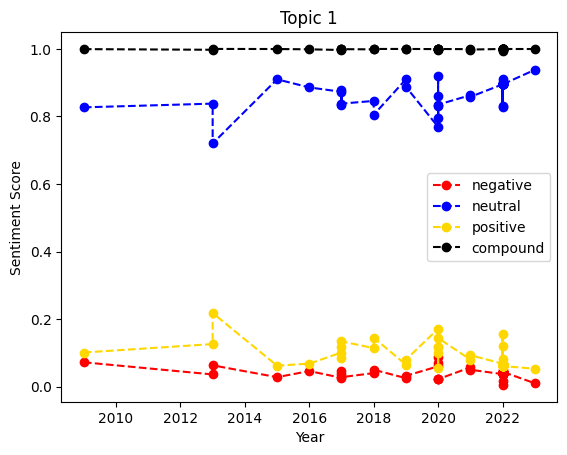

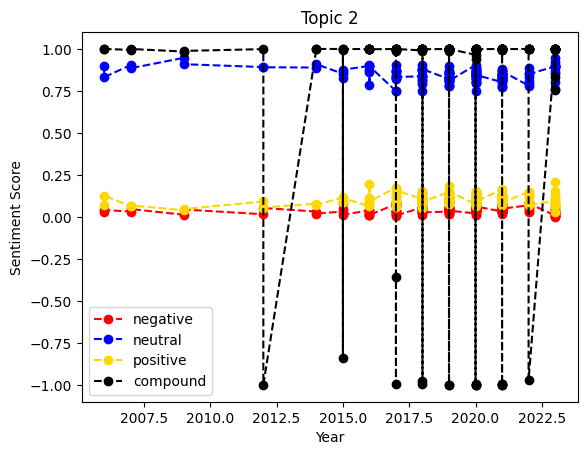

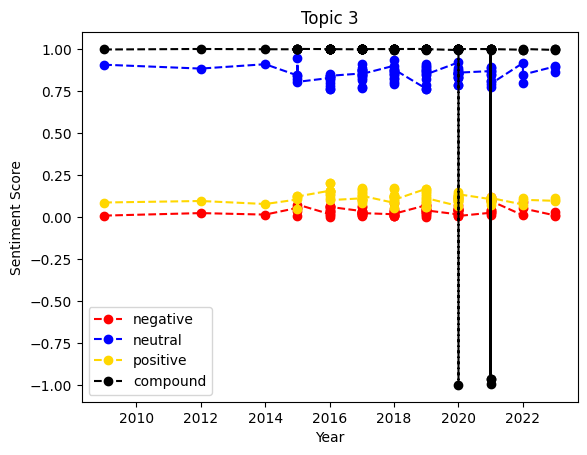

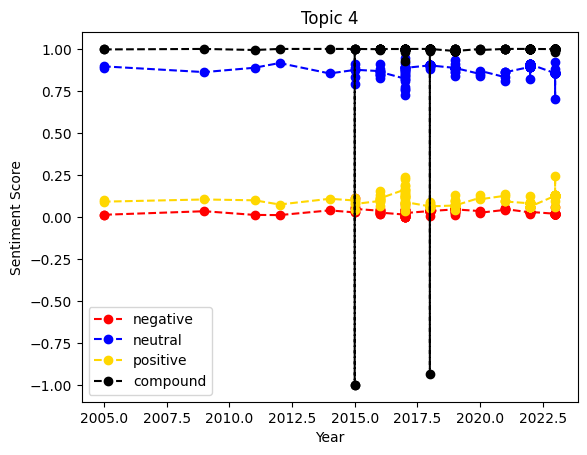

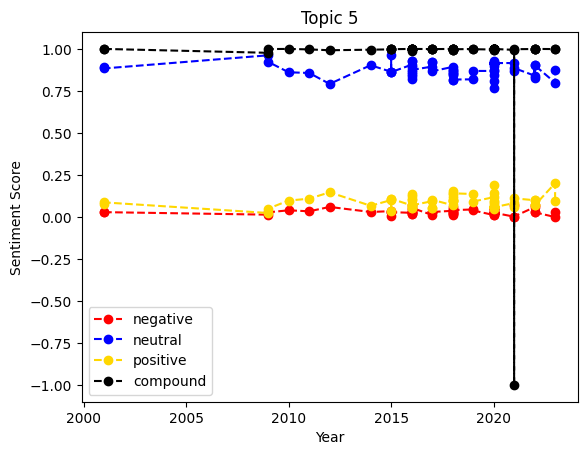

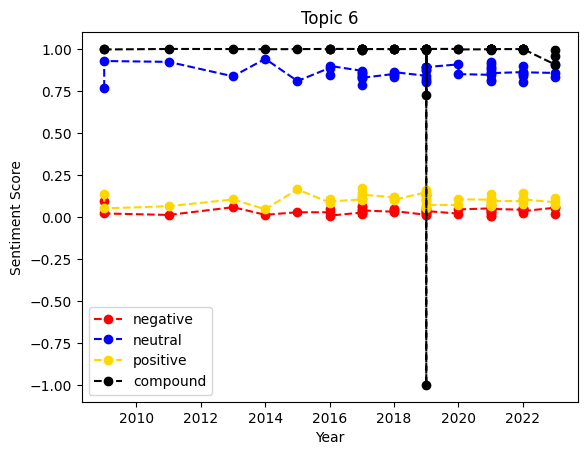

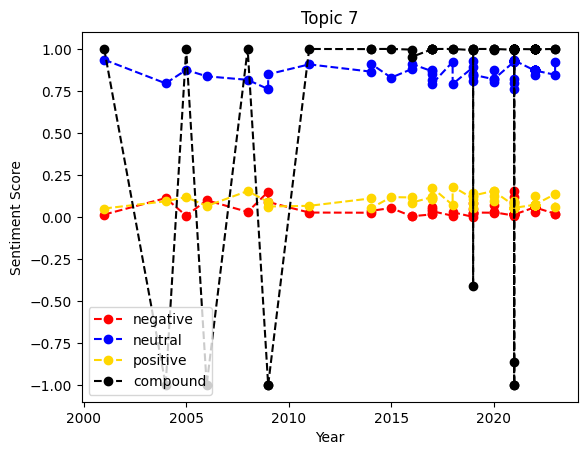

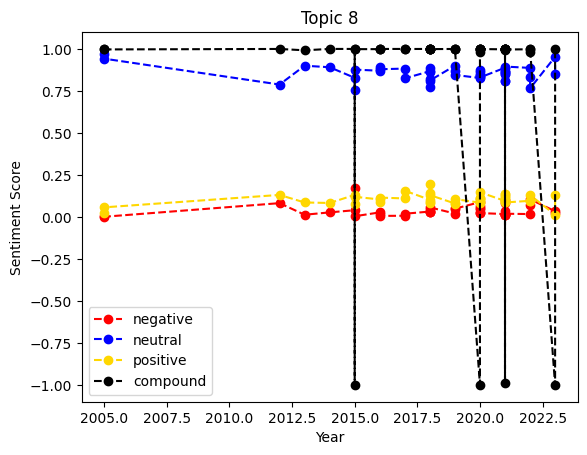

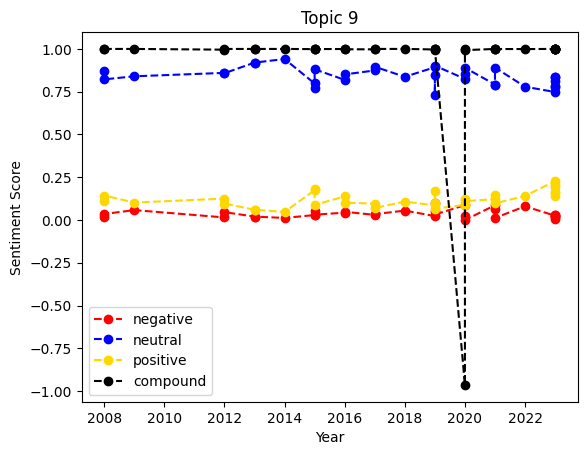

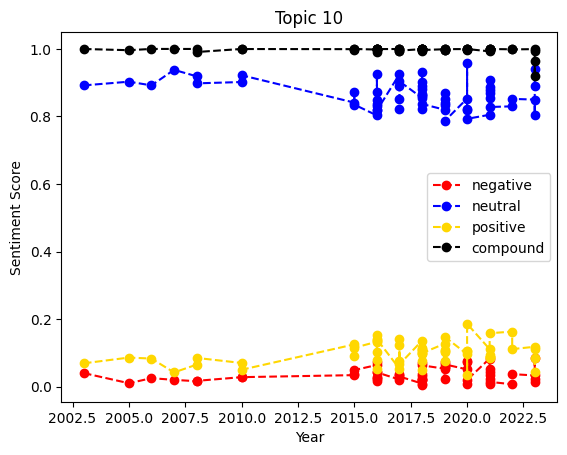

In [234]:
for topic_num, df in sorted(topic_dictionary.items()):
    title = f'Topic {topic_num + 1}'
    plot_sentiment(df, title)
